## Predict Student Scores from Study Hours and Sleep Hours

1. Importing packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

2. Loading the dataset

In [2]:
# Load your dataset (ensure student_scores.csv is in the same folder)
df = pd.read_csv('C:\\Users\\USER\\Desktop\\ML_projects\\ML_trainee\\Day-9\\student_scores.csv')

# Preview the data
df.head()


,Hours,Score
0,3.9,28
1,4.1,34
2,6.5,44
3,1.3,49
4,3.6,100


3. Data Summary

In [3]:
# Check for missing values and describe basic stats
print("Missing values:\n", df.isnull().sum())
df.describe()


Missing values:
 Hours    0
Score    0
dtype: int64


,Hours,Score
count,100.000000,100.000000
mean,4.962000,59.440000
std,2.747443,26.478243
min,1.000000,10.000000
25%,2.875000,40.750000
50%,4.600000,58.000000
75%,7.075000,85.000000
max,10.000000,100.000000


4. EDA Scatter-plots

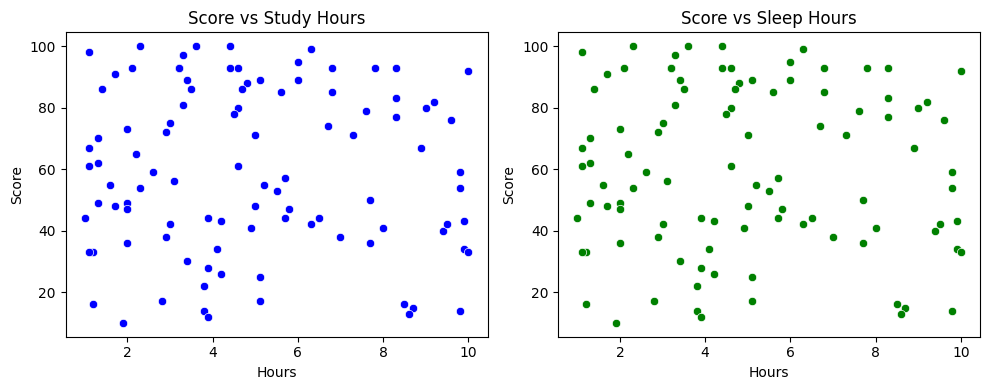

In [6]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Hours', y='Score', color='blue')
plt.title('Score vs Study Hours')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Hours', y='Score', color='green')
plt.title('Score vs Sleep Hours')

plt.tight_layout()
plt.show()


5. Correlation Matrix

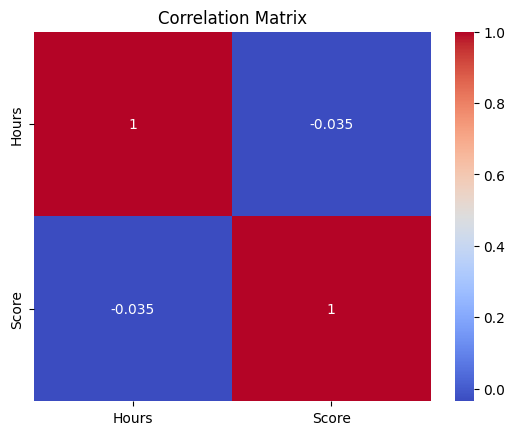

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


6. splitting features and targets


In [8]:
X = df[['Hours']]
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Train the Model

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

8. Evaluate the Model

In [10]:
y_pred = model.predict(X_test)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Coefficients: [-0.35285368]
Intercept: 59.193810580931604
Mean Squared Error: 1019.1853588871994
R² Score: -0.11583020228238228


9. Actual vs Predicted 

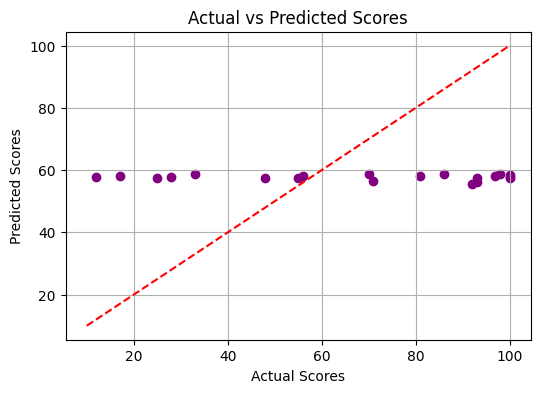

In [11]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()


10. Feature Importance

In [12]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
importance


,Feature,Coefficient
0,Hours,-0.352854


11. 📝 Interpretation

EDA helps check correlation and outliers.

The Linear Regression model predicts scores using both features.

Coefficients show how much each hour of study/sleep impacts the score.

The R² Score shows how well the model fits the data (closer to 1 = better).

The feature importance table ranks how impactful each variable is.

